In [ ]:
import pandas as pd
data_columns = ['x', 'y', 'class']
data = pd.read_csv("data.csv", header=None, names=data_columns, usecols=[0, 1, 2])


          x         y  class
0   0.78051 -0.063669      1
1   0.28774  0.291390      1
2   0.40714  0.178780      1
3   0.29230  0.421700      1
4   0.50922  0.352560      1
..      ...       ...    ...
95  0.77029  0.701400      0
96  0.73156  0.717820      0
97  0.44556  0.579910      0
98  0.85275  0.859870      0
99  0.51912  0.623590      0

[100 rows x 3 columns]


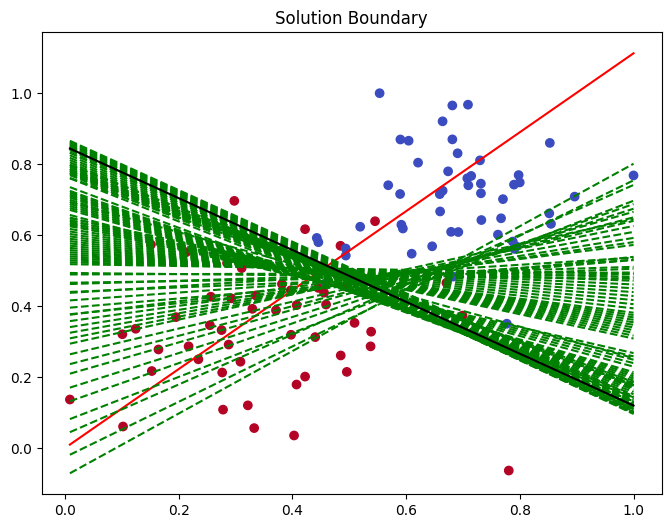

Final Accuracy: 93.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#prepare the data
X = data[['x', 'y']].values
Y = data[['class']].values

weights = np.random.uniform(-1, 1, X.shape[1])  #random weights for each feature (x, y)
bias = np.random.uniform(-1, 1)  #random bias term

learning_rate = 0.01
epochs = 100

def step_function(x):
    return 1 if x >= 0 else 0

#function to plot the decision boundary
def plot_decision_boundary(weights, bias, color='black', linestyle='-'):
    x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)  #generate x values for plotting
    y_values = -(weights[0] * x_values + bias) / weights[1]  #calculate corresponding y values for decision boundary
    plt.plot(x_values, y_values, color=color, linestyle=linestyle)

#plot initial separation line (red)
plt.figure(figsize=(8, 6))
plot_decision_boundary(weights, bias, color='red', linestyle='-')

#perceptron training
for epoch in range(epochs):
    for i in range(X.shape[0]):
        linear_output = np.dot(X[i], weights) + bias  #compute linear combination of inputs

        prediction = step_function(linear_output) 

        error = Y[i] - prediction  

        if error == 1:  
            bias += learning_rate  
            weights += learning_rate * X[i]  #increase weights by r * xi
        elif error == -1:  
            bias -= learning_rate  
            weights -= learning_rate * X[i]  #decrease weights by r * xi


    plot_decision_boundary(weights, bias, color='green', linestyle='--')


plot_decision_boundary(weights, bias, color='black', linestyle='-')

#plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap='coolwarm', marker='o')
plt.title('Solution Boundary')
plt.show()


def predict(X):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)


predictions = [predict(x) for x in X]

#compare predictions with actual labels to calculate accuracy
correct_predictions = np.sum(predictions == Y.flatten())  # Flatten Y to match the shape of predictions
accuracy = correct_predictions / len(Y)  # Calculate accuracy as a percentage

print(f"Final Accuracy: {accuracy * 100:.2f}%")


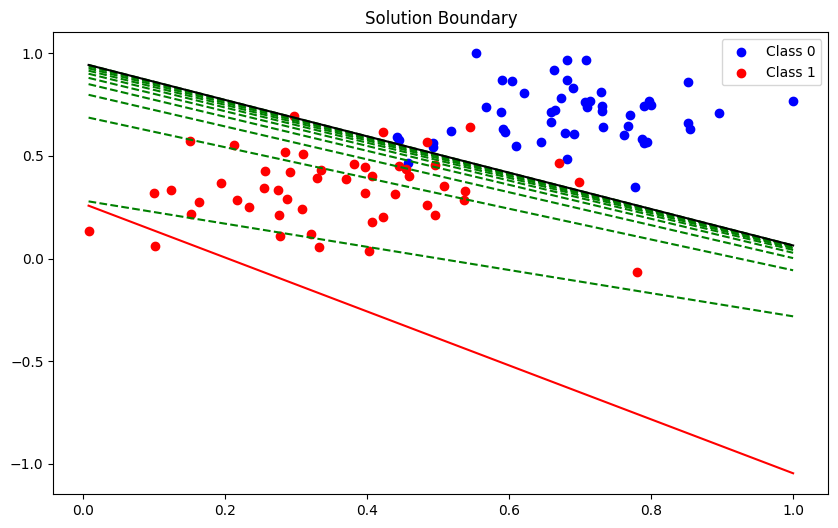

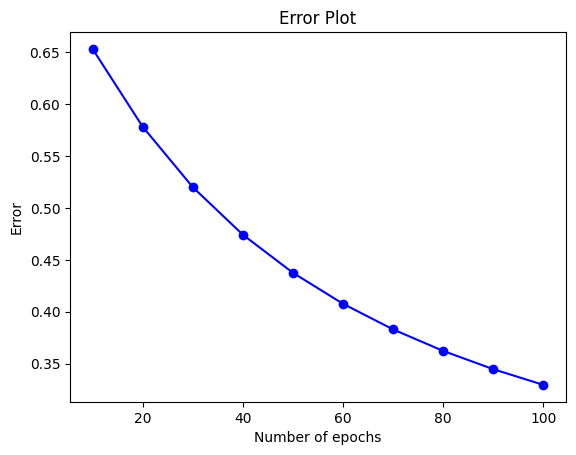

Final Accuracy: 93.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#prepare the data
X = data[['x', 'y']].values
Y = data[['class']].values.flatten()  #flatten Y for easy computation

#initialize weights and bias
weights = np.random.uniform(-1, 1, X.shape[1])
bias = np.random.uniform(-1, 1)

learning_rate = 1
epochs = 100


log_losses = []


def step_function(x):
    return 1 if x >= 0 else 0

#sigmoid function for probability calculation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#plotting function for decision boundary
def plot_decision_boundary(weights, bias, color, linestyle='-'):
    x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, color=color, linestyle=linestyle)

#initial plot setup
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Class 1')
plot_decision_boundary(weights, bias, color='red')  # Initial boundary in red


for epoch in range(epochs):
    #calculate predictions for all points
    linear_outputs = np.dot(X, weights) + bias
    predictions = sigmoid(linear_outputs)
    

    errors = Y - predictions
    
    #calculate gradient
    weights_gradient = -np.dot(X.T, errors) / len(Y)
    bias_gradient = -np.mean(errors)
    
    #update weights and bias
    weights -= learning_rate * weights_gradient
    bias -= learning_rate * bias_gradient
    
    #compute log loss 
    log_loss = -np.mean(Y * np.log(predictions + 1e-9) + (1 - Y) * np.log(1 - predictions + 1e-9))
    
    #store log loss every 10 epochs and plot the boundary
    if (epoch + 1) % 10 == 0:
        log_losses.append(log_loss)
        plot_decision_boundary(weights, bias, color='green', linestyle='--')  # Dashed green lines every 10 epochs


plot_decision_boundary(weights, bias, color='black')
plt.title('Solution Boundary')
plt.legend()


plt.figure()
plt.plot(range(10, epochs + 1, 10), log_losses, color='blue', marker='o')
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()

#final predictions and accuracy calculation
final_predictions = [step_function(np.dot(x, weights) + bias) for x in X]
correct_predictions = np.sum(final_predictions == Y)
accuracy = correct_predictions / len(Y)

#print final accuracy
print(f"Final Accuracy: {accuracy * 100:.2f}%")
